# Code for the subplots shown in Figure 8

Developed by Siobhan Powell, 2021. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.chdir('..')

In [3]:
os.mkdir('MainPlotting/Plots/'+'StatePlots')

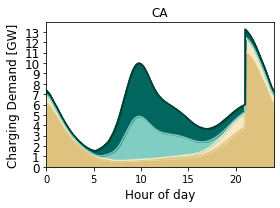

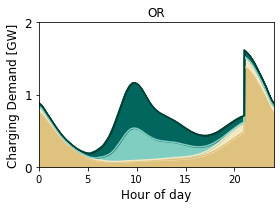

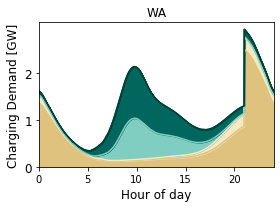

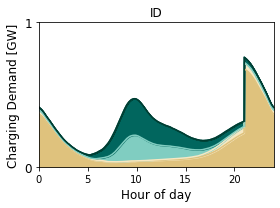

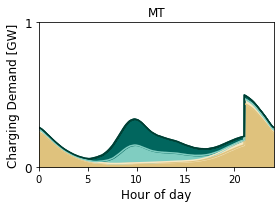

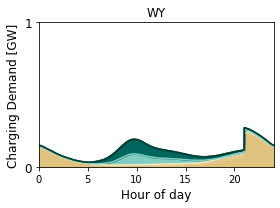

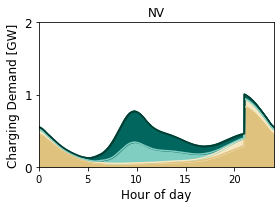

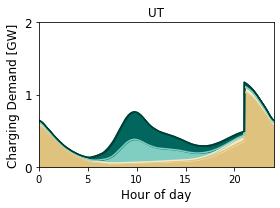

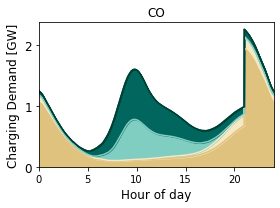

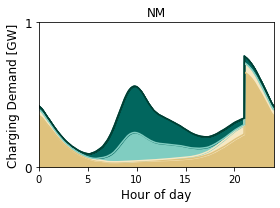

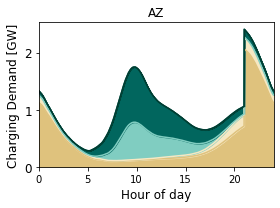

In [4]:
folder = '../EVDemandModel_EVScenarios/RunningModel/Outputs/'
for state in ['CA', 'OR', 'WA', 'ID', 'MT', 'WY', 'NV', 'UT', 'CO', 'NM', 'AZ']:
    df_plot = pd.read_csv(folder+'HighHome_100p_'+state+'_20211119.csv', index_col=0)
    colors = {'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}

    fig, ax = plt.subplots(figsize=(4,3))
    baseline = np.zeros((1440, ))
    for i, key in enumerate(df_plot.columns[1:]):
        ax.plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*df_plot[key].values, color=colors[key])
        ax.fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*df_plot[key].values, color=colors[key], label=key)
        baseline += (1/1000)*(1/1000)*df_plot[key].values
    ax.set_xlim([0, 24])
    ax.set_xlabel('Hour of day', fontsize=12)
    ax.set_ylabel('Charging Demand [GW]', fontsize=12)
    if np.max(baseline) < 1:
        ax.set_ylim(bottom=0, top=1)
        ax.set_yticks([0,1])
        ax.set_yticklabels([0, 1], fontsize=12)
    elif np.max(baseline) < 2:
        ax.set_ylim(bottom=0, top=2)
        ax.set_yticks([0,1,2])
        ax.set_yticklabels([0, 1, 2], fontsize=12)
    else:
        ax.set_ylim(bottom=0)#, top=9)
        ax.set_yticks(np.arange(0, int(np.ceil(np.max(baseline)))).astype(int))
        ax.set_yticklabels(np.arange(0, int(np.ceil(np.max(baseline)))).astype(int), fontsize=12)
    ax.set_title(state)
    plt.tight_layout()
    plt.savefig('MainPlotting/Plots/'+'StatePlots/'+state+'.pdf', bbox_inches='tight')
    plt.savefig('MainPlotting/Plots/'+'StatePlots/'+state+'.png', bbox_inches='tight')
    plt.show()

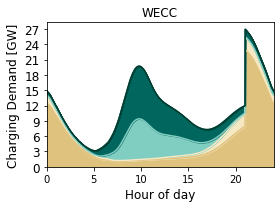

In [6]:
df_plot = pd.read_csv(folder+'HighHome_100p_'+'WECC'+'_20211119.csv', index_col=0)
# df_plot = pd.read_csv(folder+'BaseCase_NoL1_100p_NoTimers_'+'WECC'+'_20210813.csv', index_col=0)
colors = {'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}

fig, ax = plt.subplots(figsize=(4,3))
baseline = np.zeros((1440, ))
for i, key in enumerate(df_plot.columns[1:]):
    ax.plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*df_plot[key].values, color=colors[key])
    ax.fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*df_plot[key].values, color=colors[key], label=key)
    baseline += (1/1000)*(1/1000)*df_plot[key].values
ax.set_xlim([0, 24])
ax.set_xlabel('Hour of day', fontsize=12)
ax.set_ylabel('Charging Demand [GW]', fontsize=12)
ax.set_ylim(bottom=0)#, top=9)
ax.set_yticks(np.arange(0, 28, 3).astype(int))
ax.set_yticklabels(np.arange(0, 28, 3).astype(int), fontsize=12)
ax.set_title('WECC')
plt.tight_layout()
plt.savefig('MainPlotting/Plots/'+'StatePlots/'+'WECC'+'.pdf', bbox_inches='tight')
plt.savefig('MainPlotting/Plots/'+'StatePlots/'+'WECC'+'.png', bbox_inches='tight')
plt.show()